## Kolmogorov-Smirnov test

This test compares the cumulative distributions of two data sets to determine if they differ significantly. It's a non-parametric and distribution-free test, meaning it does not assume a specific distribution for the data, making it versatile for various types of data.

#### Why use it:

 To test whether two independent samples come from the same distribution. It's useful when you're not sure of the distribution's shape and want to compare two samples directly.

In [ ]:
%python

from scipy import stats

# Assuming you have two arrays of sample data: sample1 and sample2
statistic, p_value = stats.ks_2samp(sample1, sample2)

print(f"KS Statistic: {statistic}, P-value: {p_value}")

#### Parameters:

*   **sample1, sample2:**
> Arrays of sample data representing the two groups you want to compare.
*   **alternative (optional):**
> Specifies the alternative hypothesis. The options are <u>'two-sided'</u> (default), <u>'less'</u>, or <u>'greater'</u>. <u>'two-sided'</u> tests for the hypothesis that the two distributions are different, while <u>'less'</u> and <u>'greater'</u> test for one distribution being stochastically less than or greater than the other, respectively.




#### How to Interpret Results:

**Statistic:**
*  <u>Larger values indicate a greater difference between the distributions.</u>
*  The KS statistic quantifies the distance between the empirical distribution functions of the two samples.
   
**P-value:**
*   If the p-value is less than your chosen significance level (in the sample below we use 0.05), you reject the null hypothesis and conclude that the distributions of the two samples are significantly different.

This test is great for quickly assessing if there is a significant difference in the distributions between two groups, which is common in A/B testing.

#### Create a Sample Dataset

In [ ]:
from scipy import stats
import numpy as np

# Unbalanced - different distributions
np.random.seed(0)  # for reproducibility
sample_unbalanced_1 = np.random.normal(loc=0, scale=1, size=1000)  # Normal distribution, mean=0, std=1
sample_unbalanced_2 = np.random.normal(loc=1, scale=1.5, size=1000)  # Different Normal distribution, mean=1, std=1.5

# Balanced - similar distributions
sample_balanced_1 = np.random.normal(loc=0, scale=1, size=1000)  # Normal distribution, mean=0, std=1
sample_balanced_2 = np.random.normal(loc=0, scale=1, size=1000)  # Same Normal distribution, mean=0, std=1


#### Runnning Kolmogorov-Smirnov on the Sample Datasets

In [ ]:
# Running KS test on the datasets
ks_statistic_unbalanced, p_value_unbalanced = stats.ks_2samp(sample_unbalanced_1, sample_unbalanced_2)
ks_statistic_balanced, p_value_balanced = stats.ks_2samp(sample_balanced_1, sample_balanced_2)

print(f"KS Statistic Unbalanced: {ks_statistic_unbalanced}, P-value: {p_value_unbalanced}")
print(f"KS Statistic Balanced: {ks_statistic_balanced}, P-value: {p_value_balanced}")

KS Statistic Unbalanced: 0.378, P-value: 5.145848984405932e-64
KS Statistic Balanced: 0.03, P-value: 0.7593695685682871


#### Interpretation of Results

\\( H_0\\) = the two samples come from the same continous distribution.

## TLDR: A low `p-value` (lower than $\alpha$) indicates significant evidence against \\( H_0\\).

**Unbalanced datasets:**

*   <u>KS statistic:</u> 0.378
*   <u>P-value:</u> Approximately 5.15*e*−64.
*   <u>Interpretation:</u>
> Exceptionally low p-value at 5.15 x 10<sup>−64</sup>.
  * This is far below any conventional alpha level, such as 0.05.
  * We reject the null hypothesis (that these samples are from![empirical_dist.png](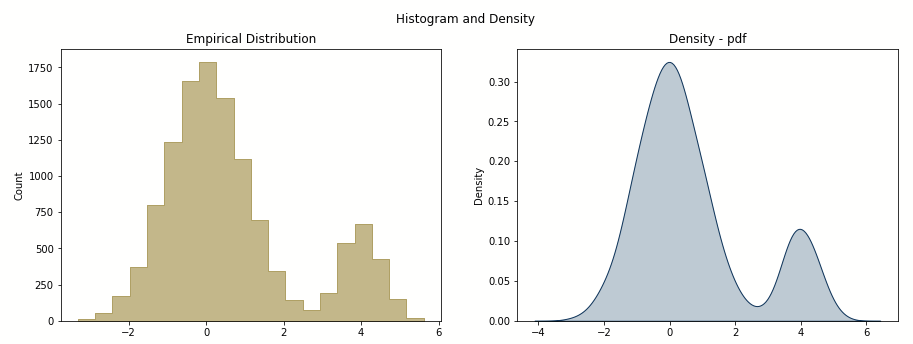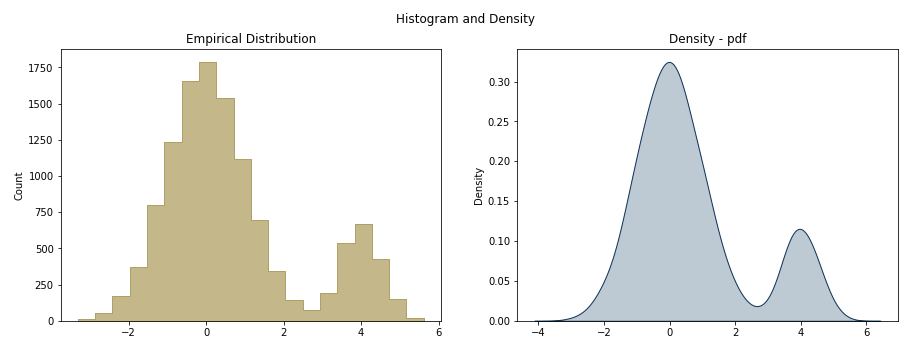) the same distribution).
  * This indicates that the two samples come from different distributions.
  * This is expected as the samples were generated from distributions with different means and standard deviations.

**Balanced datasets:**

*   <u>KS statistic:</u> 0.03
*   <u>P-value:</u> Approximately 0.759
*   <u>Interpretation:</u>
> High p-value at 0.759.
  * This is well above any conventional alpha level, such as 0.05.
  * This indicates that there is no significant difference between the distributions of the two samples.
  * This result is consistent with our setup, where both samples were drawn from the same distribution.

**Final Take:**
<br>The KS test effectively differentiated between the unbalanced (differing distributions) and balanced (similar distributions) samples. In the first case, it identified the difference in distributions, and in the second, it confirmed the similarity. ​

## Wilcox Rank-Sum Test



## Chi-Square
For conversion.

* Given our conversion metrics is binary, traditional tests for comparing distributions might not be as directly applicable.
* Instead, a test designed for binary outcomes (like a Chi-square or two-proportion Z-test) would typically be used.

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Sample data setup
# Assume 'df' is your DataFrame and it contains 'test_control' column indicating group membership
# and 'buyer' column indicating conversion (1) or non-conversion (0)

# Creating a contingency table
# Count the number of conversions and non-conversions in each group
contingency_table = pd.crosstab(df['test_control'], df['buyer'])

print("Contingency Table for Conversion:")
print(contingency_table)

# Perform Chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Stat: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print("Expected Counts:")
print(expected)

# Interpretation
if p_val < 0.05:
    print("Significant difference in conversion rates between groups.")
else:
    print("No significant difference in conversion rates between groups.")


### Interpretation of Results:

\\( H_0\\) = there is no significant difference in conversion rates between the groups.

## TLDR: A low `p-value` (lower than $\alpha$) indicates significant evidence against \\( H_0\\).

That is, if `p-value` < $\alpha$, we reject \\( H_0\\).

**pd.crosstab**
* This function is used to create a *contingency table*, which counts how many users converted and didn't convert in each group.

**chi2_contingency**
* The `chi2_contingency` function then performs the Chi-square test on this contingency table, returning the <u>test statistic</u>, <u>p-value</u>, <u>degrees of freedom</u>, and the <u>expected frequencies</u> based on the assumption that there is no association between the groups and conversion rates (*i.e. that the samples are independent*).

**p-value**
* The p-value is used to determine whether the observed differences in conversion rates between the test and control groups are statistically significant.
* If the p-value is less than our chosen significance level (0.10), we reject the null hypothesis and conclude that there is a significant difference in conversion rates between the groups.
* \\( H_0\\)

In [ ]:

%sql

DROP TABLE IF EXISTS ${hivevar:user_db}.${hivevar:to_tbl}_AB_tct;

CREATE TABLE ${hivevar:user_db}.${hivevar:to_tbl}_AB_tct
  STORED AS PARQUET
  LOCATION '${hivevar:adhoc_s3_loc}/${hivevar:user_db}/${hivevar:to_tbl}_AB_tct' AS
  (

    WITH tc_app_sends AS (
          SELECT upm_id
          , CASE WHEN final_exposure_or_holdout like ${hivevar:node_tst_str} THEN 'test'
                WHEN final_exposure_or_holdout like ${hivevar:node_ctl_str} THEN 'control'
            ELSE 'na' END AS test_control
          , LEFT(timestamp,10) AS campaign_send_dt
          , CAST(LEFT(timestamp,19) AS TIMESTAMP) AS campaign_send_ts
          FROM ${hivevar:aud_table}
          WHERE CAST(LEFT(timestamp,10) AS DATE) BETWEEN ${hivevar:msmt_start_dt} AND ${hivevar:msmt_end_dt}
      )

      , tc_first_last_send AS (
        SELECT upm_id
        , MIN(campaign_send_dt) as first_send_dt
        , MAX(campaign_send_dt) as last_send_dt
        FROM tc_app_sends
        GROUP BY 1
      )

      , test_control_table AS (
          SELECT aud.*
          , fls.first_send_dt
          , fls.last_send_dt
          , LEAD(campaign_send_dt) OVER (PARTITION BY aud.upm_id ORDER BY campaign_send_dt) AS next_send_dt
          , LAG(campaign_send_dt) OVER (PARTITION BY aud.upm_id ORDER BY campaign_send_dt) AS previous_send_dt
          , (int(to_timestamp(campaign_send_dt)) - int(to_timestamp(LEAD(campaign_send_dt) OVER (PARTITION BY aud.upm_id ORDER BY campaign_send_dt))))/86400 AS difference_next_send_days
          , (int(to_timestamp(campaign_send_dt)) - int(to_timestamp(LAG(campaign_send_dt) OVER (PARTITION BY aud.upm_id ORDER BY campaign_send_dt))))/86400 AS difference_previous_send_days
          FROM tc_app_sends aud
          INNER JOIN tc_first_last_send fls ON aud.upm_id = fls.upm_id
          ANTI JOIN gwan13.bot_master_nike_com bot ON aud.upm_id = bot.upm_id
          ANTI JOIN aud_select_workspace.resellers slr ON aud.upm_id = slr.upm_id
          AND test_control != 'na'
      )

      SELECT * FROM test_control_table
  )

SELECT COUNT(*) FROM ${hivevar:user_db}.${hivevar:to_tbl}_AB_tct;


## Rebalancing Strategy

Assessing the need for rebalancing a dataset, especially for a metric like "Demand," involves a few steps to understand the underlying distribution and variability between groups (e.g., test vs. control).

Here's how I would approach it:


### 0. Perform Basic Descriptive Statistics
  * Calculate mean, median, mode, standard deviation for Demand in both groups.
  * Visualize the distributions of Demand in both groups using histograms, box plots, or density plots.

### 1. Understanding the Metric and Its Importance
- **What does "Demand" represent in our dataset?**
  * Total sales per buyer
- **How critical is "Demand" for our analysis?**
  * Demand is the main outcome, or primary kpi.
  * Conversion rate is the secondary measure.

### 2. Preliminary Data Exploration
- **What is the scale and range of "Demand"?**
  * It's continuous.
  * Max value is .
  * Min value is
  * Scale is
  * Range is
- **Are there any known outliers or extreme values in the "Demand" data?**
  * We condsider anything above 2400 an outlier.

### 3. Distribution Analysis
- **Does "Demand" follow a known distribution in each group?** (*Initial plots (histogram, boxplot) can give a visual cue. Formal tests (Shapiro-Wilk for normality) can provide statistical evidence.*)
  * Histogram shows a right tailed, bimodal distribution for both groups.
  * Shapiro Wilk value =
- **Is there a significant difference in the distribution shapes between groups?** (*This can be initially assessed visually, then tested with KS or Anderson-Darling tests*).
  * KS value =
  * AD value =

### 4. Variability Assessment
- **How comparable are the variances between the test and control groups?** (*Levene's or Brown-Forsythe tests can assess the equality of variances, an important aspect of balance.*)
  * Levene's test value =
  * Brown-Forsythe test value =


### 5. Sample Size and Power Analysis
- **Are the sample sizes between the groups comparable and sufficient?**
  * test group size =
  * control group size =

- **Have we conducted or do we need a power analysis for "Demand"?** This can inform whether the current sample sizes are adequate for detecting a meaningful difference between groups.

### 6. Assessing the Need for Rebalancing
Based on the above analyses, we can decide if rebalancing is necessary:
- **If distributions are significantly different**,
  * consider techniques like matching, stratification, or weighting to balance the groups.
- **If variances are unequal**,
  * transformations or non-parametric tests might be preferred.
- **If sample sizes are imbalanced**,
  * consider collecting more data, if possible, or applying statistical techniques that are less sensitive to imbalance.

### Specific Questions to Further Inform Strategy:
1. **Are there covariates or confounding variables that should be considered?**
  * Balancing might not only be about the primary metric but also about ensuring that important covariates are equally represented across groups.

2. **What is the goal of rebalancing?**
  * Improve test accuracy, ensure fairness in comparison, etc.
3. **Are there constraints or limitations in the data collection process that might affect rebalancing efforts?**
4. **Are we open to using statistical techniques like propensity score matching, or do we prefer simpler methods like stratification or oversampling?**
  * The choice of method can depend on the complexity of the dataset and the analysis.

Based on the team's responses to these questions, we can tailor the approach to ensure that the dataset is appropriately balanced for our specific analysis needs.

In [ ]:
# Get the measures of central tendency

import statistics

# Separate the test and control groups
test_group_ab = df_ab[df_ab['test_control'] == 'test']
control_group_ab = df_ab[df_ab['test_control'] == 'control']

def calculate_mean_median_mode(numbers):
    mean = statistics.mean(numbers)
    median = statistics.median(numbers)
    mode = statistics.mode(numbers)
    return mean, median, mode

numbers = [test_group_ab]
mean, median, mode = calculate_mean_median_mode(numbers)

print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)

### Empirical Distribtuions



[Finding the Mode of an Empirical Continuous Distribution](https://sparrow.dev/mode-of-continuous-distribution/)

[How to Use an Empirical Distribution Function in Python](https://machinelearningmastery.com/empirical-distribution-function-in-python/)

[Mathworks | Nonparametric and Empirical Probability Distributions](https://www.mathworks.com/help/stats/nonparametric-and-empirical-probability-distributions.html)

## Visualizing the Distribution

### Q-Q Plot


*   [Q-Q Plots Explained](https://builtin.com/data-science/q-q-plot)
*   [Quantile-Quantile Plot
](https://www.itl.nist.gov/div898/handbook/eda/section3/qqplot.htm)
* [StatQuest Quantile-Quantile Plots Explained (video)](https://www.youtube.com/watch?v=okjYjClSjOg&themeRefresh=1)

> **Quantile-Quantile (Q-Q)** plots help determine if the data follow a particular distribution, such as a normal distribution.
  * Deviations from the line indicate departures from the specified distribution.
  * **For a normal distribution**:
    * Curvature at the ends may suggest heavy tails in the distribution.
      * i.e. If the plot curves upwards or light tails if it curves downwards.
    * Systematic deviations to one side of the line might indicate skewness in the data.

> On the other hand, **alignment with the `Reference Line`** is evidence that the data follow the distribution we're comparing against (the reference lie is typically y = x or a fitted line based on the sample).






### Align on a distribution

It's important to note that the Q-Q plot provides a visual
assessment, which can be subjective.

* For a more objective measure, we should complement this visual inspection with statistical tests for normality, such as the **Shapiro-Wilk** test or **Anderson-Darling** test.
* Both provide a `p-value` to help assess the evidence against normality.

In [ ]:
%python
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Separate test and control groups
test_group_ab = df_ab[df_ab['test_control'] == 'test']
control_group_ab = df_ab[df_ab['test_control'] == 'control']

# For the test group
plt.figure(figsize=(10,6))  # Making the plot larger
stats.probplot(test_group_ab['demand'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot of Test Group Demand vs. Normal Distribution')
plt.show()

# For the control group
plt.figure(figsize=(10,6))  # Making the plot larger
stats.probplot(control_group_ab['demand'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot of Control Group Demand vs. Normal Distribution')
plt.show()


##### Q-Q Plot Reults

Results:



1. Q-Q plot for our demand data curves upward at the ends, especially on the right.
2. This indicates a right-skewed distribution.
3. The deviation from the reference line also highlights that **the data do not follow a normal distribution**.
4. This is important because many statistical tests assume normality.
5. Non-parametric tests do not assume a specific distribution.
  * Making them an appropriate choice for comparing our test and control groups.
6. Confirming that the Mann-Whitney U test (also known as the Wilcoxon rank-sum test) is already a good choice we've considered.


#### Anderson-Darling test

Because I'd like to have an objective measure for the distribution of our data (rather than the subjective *visual* one the Q-Q plot provides).



In [ ]:
%python
from scipy import stats

# Separate test and control groups
test_group_ab = df_ab[df_ab['test_control'] == 'test']
control_group_ab = df_ab[df_ab['test_control'] == 'control']

# For the 'demand' variable in the test group
result_ad_test_demand_ab = stats.anderson(test_group_ab['demand'].dropna(), dist='norm')
print("Anderson-Darling Test (Test Group - Demand):")
print("Statistic:", result_ad_test_demand_ab.statistic)
for i in range(len(result_ad_test_demand_ab.critical_values)):
    sl, cv = result_ad_test_demand_ab.significance_level[i], result_ad_test_demand_ab.critical_values[i]
    print(f"Significance Level {sl}%: Critical Value {cv}")

# For the 'demand' variable in the control group
result_ad_control_demand_ab = stats.anderson(control_group_ab['demand'].dropna(), dist='norm')
print("\nAnderson-Darling Test (Control Group - Demand):")
print("Statistic:", result_ad_control_demand_ab.statistic)
for i in range(len(result_ad_control_demand_ab.critical_values)):
    sl, cv = result_ad_control_demand_ab.significance_level[i], result_ad_control_demand_ab.critical_values[i]
    print(f"Significance Level {sl}%: Critical Value {cv}")

"""

Results:

Anderson-Darling Test (Test Group - Demand):
Statistic: 63.472701966504246
Significance Level 15.0%: Critical Value 0.575
Significance Level 10.0%: Critical Value 0.655
Significance Level 5.0%: Critical Value 0.786
Significance Level 2.5%: Critical Value 0.916
Significance Level 1.0%: Critical Value 1.09

Anderson-Darling Test (Control Group - Demand):
Statistic: 65.49997798189042
Significance Level 15.0%: Critical Value 0.575
Significance Level 10.0%: Critical Value 0.655
Significance Level 5.0%: Critical Value 0.786
Significance Level 2.5%: Critical Value 0.917
Significance Level 1.0%: Critical Value 1.09

"""

### Anderson-Darling Results Interpretation

The results from the Anderson-Darling test indicate the test statistic and critical values for different significance levels for both the test and control groups' demand data.

The Anderson-Darling `test statistic` is a measure of how well the data fit the specified distribution—in this case, a normal distribution.

The `critical values` correspond to different significance levels (i.e., the probability of observing a test statistic as extreme as, or more so, if the null hypothesis were true).

- **Test Statistic:** Represents the measure of departure of the observed data from the theoretical distribution. Higher values indicate a greater departure.
- **Critical Values:** Thresholds that the test statistic must exceed to reject the null hypothesis that the data follow a specified distribution (normal distribution here) at the given significance level.

### Results Interpretation

* For both the test and control groups, the test statistics are significantly higher than the critical values at all listed significance levels (15%, 10%, 5%, 2.5%, and 1.0%).

* This outcome means we can reject the null hypothesis that the demand data come from a normal distribution at all these levels of significance.

- **`Test Group Statistic` (63.47) and `Control Group Statistic` (65.50):**
  * Both are far above the highest critical value (1.09 for the 1% significance level), suggesting a strong departure from normality.

### Implications

The results strongly suggest that the demand data in both the test and control groups do not follow a normal distribution.
* This finding is critical for determining the appropriate statistical tests to use for further analysis.
* Given this departure from normality, relying on tests that assume normality (like the traditional t-test for means) might not be appropriate.
* Instead, non-parametric tests (like the **Mann-Whitney U test** for comparing medians) that do not assume specific distributions could be more suitable for comparing the central tendencies of the two groups.

This analysis aligns with my earlier observation of a bimodal, right-tailed shape in the demand data distribution.

Non-parametric methods or transformation of data might be needed for any comparative analysis or inferential statistics involving this demand data.